<a href="https://colab.research.google.com/github/shubhamrai1318/TakeHomeTask/blob/main/TakeHomeTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EUROMONITOR** Take Home Task

## **Task1** - Ice-Cream

### Importing Libraries

In [66]:
import pandas as pd

### Loading Dataset

In [67]:
# Load Dataset
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Loading the Dataset
file_path = '/content/drive/MyDrive/Shubham/CsvFiles/ice.cream.data.csv'
df_icecream = pd.read_csv(file_path)
df_icecream.head()

,Region,Country,CountryID,Industry,Edition,Category,ParentID,Subcategory,ProductID,Lowest Level,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,NaN,29.238692,30.340307,31.797428,33.885975,35.270988,36.555240,37.919347,39.441743,41.215181
1,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
2,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,31.683196,32.468827,33.824007,35.596403,38.052311,39.834793,41.564929,43.443030,45.547622,47.999423
3,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,24.040194,24.672854,25.726400,27.091032,28.971497,30.381223,31.765794,33.267206,34.958683,36.929247
4,Asia Pacific,Azerbaijan,163,Packaged Food,2015,Ice Cream,160660,Ice Cream,160660,no,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649


### Some Data Manipulation

In [69]:
df_icecream.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [70]:
df_icecream['Data Type'].value_counts()

Retail Volume             80
Retail Volume (Tonnes)    80
Total Volume              80
Total Volume (Tonnes)     80
Retail Value RSP          80
Name: Data Type, dtype: int64

### **(Task 1.1) Subsetting the data accordingly (For Retail Volume and Retail Value)**

In [71]:
# 1.1 Subsetting the data accordingly (For Retail Volume and Retail Value)
df_icecream = df_icecream[df_icecream['Data Type'].isin(['Retail Volume (Tonnes)', 'Retail Value RSP'])]

### **(Task 1.2) Remove unnecessary columns**

In [72]:
# Task 1.2: Remove unnecessary columns
columns_to_keep = ['Region', 'Country', 'Data Type', 'Unit', 'Unit Multiplier'] + [str(year) for year in range(2000, 2020)]
df_icecream = df_icecream[columns_to_keep]

### **(Task 1.3) Converting volume to kilograms and value to US dollars**

In [73]:
# Task 1.3. Converting volume to kilograms and value to US dollars
df_icecream = df_icecream.melt(id_vars = ['Region','Country','Data Type', 'Unit', 'Unit Multiplier'],var_name = 'Year',value_name = 'Value')

df_vol = df_icecream[df_icecream['Data Type'] == 'Retail Volume (Tonnes)']
df_val = df_icecream[df_icecream['Data Type'] == 'Retail Value RSP']

# Multiplying value column by unit multiplier
df_vol['Value'] *= df_vol['Unit Multiplier']
df_val['Value'] *= df_val['Unit Multiplier']

final_ice_cream = pd.merge(df_vol[['Region','Country','Year','Value']],
                           df_val[['Region','Country','Year','Value']],
                           on=['Region','Country','Year'],
                           suffixes=('_vol','_val')
                           )
final_ice_cream

<ipython-input-73-11b7d8322c4e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['Value'] *= df_vol['Unit Multiplier']
<ipython-input-73-11b7d8322c4e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Value'] *= df_val['Unit Multiplier']


,Region,Country,Year,Value_vol,Value_val
0,Asia Pacific,Azerbaijan,2000,1.333455e+04,NaN
1,Asia Pacific,China,2000,1.156621e+06,3.263993e+09
2,Asia Pacific,"Hong Kong, China",2000,6.954414e+03,1.093822e+08
3,Asia Pacific,India,2000,2.781635e+04,1.761964e+08
4,Asia Pacific,Indonesia,2000,3.143843e+04,1.589791e+08
...,...,...,...,...,...
1595,Western Europe,Spain,2019,2.423816e+05,1.878799e+09
1596,Western Europe,Sweden,2019,5.539142e+04,8.552522e+08
1597,Western Europe,Switzerland,2019,2.653624e+04,5.866347e+08
1598,Western Europe,Turkey,2019,2.215182e+05,1.624600e+09


### **(Task 1.4) Converting data to the analysis friendly format**

In [74]:
# 1.4 Converting data to the analysis friendly format
# Define the desired order of columns
final_ice_cream.columns = ['Region','Country','Year','Retail Volume','Retail Value RSP']
desired_columns_order = ['Region', 'Country', 'Year', 'Retail Value RSP', 'Retail Volume']

# Reorder the columns
final_ice_cream = final_ice_cream[desired_columns_order]

final_ice_cream

,Region,Country,Year,Retail Value RSP,Retail Volume
0,Asia Pacific,Azerbaijan,2000,NaN,1.333455e+04
1,Asia Pacific,China,2000,3.263993e+09,1.156621e+06
2,Asia Pacific,"Hong Kong, China",2000,1.093822e+08,6.954414e+03
3,Asia Pacific,India,2000,1.761964e+08,2.781635e+04
4,Asia Pacific,Indonesia,2000,1.589791e+08,3.143843e+04
...,...,...,...,...,...
1595,Western Europe,Spain,2019,1.878799e+09,2.423816e+05
1596,Western Europe,Sweden,2019,8.552522e+08,5.539142e+04
1597,Western Europe,Switzerland,2019,5.866347e+08,2.653624e+04
1598,Western Europe,Turkey,2019,1.624600e+09,2.215182e+05


### **(Task 1.5)	Renaming variables to “Ice Cream Value” and “Ice Cream Volume”**

In [75]:
# 1.5	Renaming variables to “Ice Cream Value” and “Ice Cream Volume”
final_ice_cream = final_ice_cream.rename(columns={'Retail Value RSP': 'Ice Cream Value','Retail Volume':'Ice Cream Volume'})
final_ice_cream

,Region,Country,Year,Ice Cream Value,Ice Cream Volume
0,Asia Pacific,Azerbaijan,2000,NaN,1.333455e+04
1,Asia Pacific,China,2000,3.263993e+09,1.156621e+06
2,Asia Pacific,"Hong Kong, China",2000,1.093822e+08,6.954414e+03
3,Asia Pacific,India,2000,1.761964e+08,2.781635e+04
4,Asia Pacific,Indonesia,2000,1.589791e+08,3.143843e+04
...,...,...,...,...,...
1595,Western Europe,Spain,2019,1.878799e+09,2.423816e+05
1596,Western Europe,Sweden,2019,8.552522e+08,5.539142e+04
1597,Western Europe,Switzerland,2019,5.866347e+08,2.653624e+04
1598,Western Europe,Turkey,2019,1.624600e+09,2.215182e+05


### **(Task 1.6) Adding a new column 'Ice Cream Price'**


In [76]:
# 1.6 Adding a new column 'Ice Cream Price'
final_ice_cream['Ice Cream Price'] = final_ice_cream['Ice Cream Value'] / final_ice_cream['Ice Cream Volume']
final_ice_cream


,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price
0,Asia Pacific,Azerbaijan,2000,NaN,1.333455e+04,NaN
1,Asia Pacific,China,2000,3.263993e+09,1.156621e+06,2822.008420
2,Asia Pacific,"Hong Kong, China",2000,1.093822e+08,6.954414e+03,15728.456908
3,Asia Pacific,India,2000,1.761964e+08,2.781635e+04,6334.273562
4,Asia Pacific,Indonesia,2000,1.589791e+08,3.143843e+04,5056.839423
...,...,...,...,...,...,...
1595,Western Europe,Spain,2019,1.878799e+09,2.423816e+05,7751.408523
1596,Western Europe,Sweden,2019,8.552522e+08,5.539142e+04,15440.157862
1597,Western Europe,Switzerland,2019,5.866347e+08,2.653624e+04,22106.923610
1598,Western Europe,Turkey,2019,1.624600e+09,2.215182e+05,7333.935674


In [77]:
df = final_ice_cream

### **(Task 1.7) Calculating second largest region by ice cream volumes in 2018**

In [78]:
# 1.7 Calculating second largest region by ice cream volumes in 2018
final_ice_cream_grouped = final_ice_cream.groupby(['Year','Region']).agg({'Ice Cream Volume': ['sum']}).reset_index()
total_vol_by_region = final_ice_cream_grouped[final_ice_cream_grouped['Year'] == '2018'].sort_values(by=('Ice Cream Volume','sum'),ascending=False)
total_vol_by_region.iloc[1]

Year                              2018
Region                   North America
Ice Cream Volume  sum     2828540.6934
Name: 131, dtype: object

### **(Task 1.8) Creating a Function**

In [122]:
def ice_cream1(data, column, rank):
    if isinstance(data, pd.DataFrame):
        ranked_data = data.sort_values(by=column, ascending=False)
    elif isinstance(data, pd.core.groupby.DataFrameGroupBy):
        ranked_data = data[column].sum().reset_index().sort_values(by=column, ascending=False)
    else:
        raise ValueError("Unsupported data type")

    return ranked_data.iloc[rank - 1] if rank <= len(ranked_data) else f"Not enough data to retrieve rank {rank}. Returning the largest item."
def ice_cream2(df,ac,gc,year=None,rank=int):
  if year:
    new_df = final_ice_cream.groupby(gc).agg({ac: ['sum']}).reset_index()
    new_df = new_df[new_df['Year'] == year].sort_values(by=(ac,'sum'),ascending = False)
    return new_df.iloc[rank-1,1]
  else:
    return final_ice_cream.groupby(gc).agg({ac:['sum']}).reset_index().sort_values(by=(ac,'sum'),ascending = False).iloc[rank-1,0]

In [124]:
# 1.8(a) What is the third largest Region by Ice Cream Value?
third_largest_region_valuei1 = ice_cream1(final_ice_cream.groupby('Region'), 'Ice Cream Value', 3)
print(third_largest_region_valuei1)


third_largest_region_value = ice_cream2(final_ice_cream,'Ice Cream Value',['Region'],rank=3)
print("\nThird largest Region by Ice Cream Value:",third_largest_region_value)

Region                    Asia Pacific
Ice Cream Value    298317436388.039978
Name: 0, dtype: object

Third largest Region by Ice Cream Value: Asia Pacific


In [125]:
# b) What is the tenth largest country by Ice Cream Volume?
tenth_largest_country_volume = ice_cream2(final_ice_cream,'Ice Cream Volume',['Country'],rank=10)
print("\nTenth largest Country by Ice Cream Volume:")
print(tenth_largest_country_volume)


Tenth largest Country by Ice Cream Volume:
Iran


In [126]:
# c) Which country had the second largest Ice Cream Price in 2009?
second_largest_country_price_2009 = ice_cream2(final_ice_cream,'Ice Cream Price',['Year','Country'],year='2009',rank=2)
print("\nCountry with the second largest Ice Cream Price in 2009:")
print(second_largest_country_price_2009)


Country with the second largest Ice Cream Price in 2009:
Norway


## **Task2** - Macro

In [83]:
# Loading the Dataset
file_path = '/content/drive/MyDrive/Shubham/CsvFiles/macro.data.csv'
df_macro = pd.read_csv(file_path)
df_macro.head()

,Region,Country,CountryID,Industry,Edition,Category,ParentID,Subcategory,ProductID,Lowest Level,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Asia Pacific,Azerbaijan,163,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.013374e+05,1.055003e+05,1.098343e+05,1.143463e+05,1.190436e+05,1.239339e+05,1.290251e+05,1.343255e+05,1.398436e+05,1.455884e+05
1,Asia Pacific,China,195,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.572255e+07,1.666598e+07,1.766592e+07,1.872588e+07,1.984943e+07,2.104040e+07,2.230282e+07,2.364099e+07,2.505945e+07,2.656302e+07
2,Asia Pacific,"Hong Kong, China",259,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,3.553615e+05,3.670885e+05,3.792024e+05,3.917161e+05,4.046427e+05,4.179959e+05,4.317898e+05,4.460389e+05,4.607581e+05,4.759632e+05
3,Asia Pacific,India,265,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,3.208204e+06,3.426360e+06,3.659353e+06,3.908189e+06,4.173946e+06,4.457774e+06,4.760902e+06,5.084644e+06,5.430400e+06,5.799667e+06
4,Asia Pacific,Indonesia,263,Countries & Consumers,2014,Economy and Finance,1632,Total GDP,1634,no,...,1.331538e+06,1.404773e+06,1.482036e+06,1.563548e+06,1.649543e+06,1.740267e+06,1.835982e+06,1.936961e+06,2.043494e+06,2.155886e+06


In [84]:
df = df_macro
df_macro.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

In [85]:
df_macro['Subcategory'].value_counts()

  Total GDP                                      80
  Possession of Refrigerator                     80
Population: National Estimates at January 1st    80
Name: Subcategory, dtype: int64

In [86]:
columns_to_drop = ['CountryID', 'Industry', 'Edition', 'ParentID', 'ProductID', 'Lowest Level', 'Modelled', 'Hierarchy Level', 'DataTypeID', 'Unit', 'Unit Multiplier', 'Current/Constant', 'Currency Conversion']

# Drop the specified columns
df_macro = df_macro.drop(columns=columns_to_drop)

In [87]:
df_macro.head()

,Region,Country,Category,Subcategory,Data Type,1977,1978,1979,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Asia Pacific,Azerbaijan,Economy and Finance,Total GDP,Socio-economic indicators,NaN,NaN,NaN,NaN,NaN,...,1.013374e+05,1.055003e+05,1.098343e+05,1.143463e+05,1.190436e+05,1.239339e+05,1.290251e+05,1.343255e+05,1.398436e+05,1.455884e+05
1,Asia Pacific,China,Economy and Finance,Total GDP,Socio-economic indicators,324287.15050,362228.74710,389758.13190,420588.00010,442458.5761,...,1.572255e+07,1.666598e+07,1.766592e+07,1.872588e+07,1.984943e+07,2.104040e+07,2.230282e+07,2.364099e+07,2.505945e+07,2.656302e+07
2,Asia Pacific,"Hong Kong, China",Economy and Finance,Total GDP,Socio-economic indicators,44929.90188,48704.01364,54353.67922,59973.84965,65604.7944,...,3.553615e+05,3.670885e+05,3.792024e+05,3.917161e+05,4.046427e+05,4.179959e+05,4.317898e+05,4.460389e+05,4.607581e+05,4.759632e+05
3,Asia Pacific,India,Economy and Finance,Total GDP,Socio-economic indicators,254198.81870,268179.75370,254770.76600,264008.75400,280313.9346,...,3.208204e+06,3.426360e+06,3.659353e+06,3.908189e+06,4.173946e+06,4.457774e+06,4.760902e+06,5.084644e+06,5.430400e+06,5.799667e+06
4,Asia Pacific,Indonesia,Economy and Finance,Total GDP,Socio-economic indicators,138042.39820,148809.70530,158184.71670,173813.36670,187030.1351,...,1.331538e+06,1.404773e+06,1.482036e+06,1.563548e+06,1.649543e+06,1.740267e+06,1.835982e+06,1.936961e+06,2.043494e+06,2.155886e+06


In [88]:
# Task 1.2: Remove unnecessary columns
columns_to_keep = ['Region', 'Country', 'Category', 'Subcategory'] + [str(year) for year in range(1977, 2031)]
df_macro = df_macro[columns_to_keep]
df_macro.head()

,Region,Country,Category,Subcategory,1977,1978,1979,1980,1981,1982,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Asia Pacific,Azerbaijan,Economy and Finance,Total GDP,NaN,NaN,NaN,NaN,NaN,NaN,...,1.013374e+05,1.055003e+05,1.098343e+05,1.143463e+05,1.190436e+05,1.239339e+05,1.290251e+05,1.343255e+05,1.398436e+05,1.455884e+05
1,Asia Pacific,China,Economy and Finance,Total GDP,324287.15050,362228.74710,389758.13190,420588.00010,442458.5761,482722.30650,...,1.572255e+07,1.666598e+07,1.766592e+07,1.872588e+07,1.984943e+07,2.104040e+07,2.230282e+07,2.364099e+07,2.505945e+07,2.656302e+07
2,Asia Pacific,"Hong Kong, China",Economy and Finance,Total GDP,44929.90188,48704.01364,54353.67922,59973.84965,65604.7944,67561.78541,...,3.553615e+05,3.670885e+05,3.792024e+05,3.917161e+05,4.046427e+05,4.179959e+05,4.317898e+05,4.460389e+05,4.607581e+05,4.759632e+05
3,Asia Pacific,India,Economy and Finance,Total GDP,254198.81870,268179.75370,254770.76600,264008.75400,280313.9346,291728.31810,...,3.208204e+06,3.426360e+06,3.659353e+06,3.908189e+06,4.173946e+06,4.457774e+06,4.760902e+06,5.084644e+06,5.430400e+06,5.799667e+06
4,Asia Pacific,Indonesia,Economy and Finance,Total GDP,138042.39820,148809.70530,158184.71670,173813.36670,187030.1351,191230.83200,...,1.331538e+06,1.404773e+06,1.482036e+06,1.563548e+06,1.649543e+06,1.740267e+06,1.835982e+06,1.936961e+06,2.043494e+06,2.155886e+06


In [89]:
# Task 1.3. Converting volume to kilograms and value to US dollars
df_macro = df_macro.melt(id_vars = ['Region','Country','Category', 'Subcategory'],var_name = 'Year',value_name = 'Value')

df_por = df_macro[df_macro['Subcategory'] == '  Possession of Refrigerator']
df_gdp = df_macro[df_macro['Subcategory'] == '  Total GDP']
df_pop = df_macro[df_macro['Category'] == 'Population']


In [90]:
# Merge DataFrames
final_macro = pd.merge(df_por[['Region', 'Country', 'Year', 'Value']],
               df_gdp[['Region', 'Country', 'Year', 'Value']],
               on=['Region', 'Country', 'Year'],
               suffixes=('_Possession', '_GDP'))

final_macro = pd.merge(final_macro,
               df_pop[['Region', 'Country', 'Year', 'Value']],
               on=['Region', 'Country', 'Year'],
               suffixes=('_Possession', '_GDP', '_Population'))

# Display the result
final_macro

,Region,Country,Year,Value_Possession,Value_GDP,Value
0,Asia Pacific,Azerbaijan,1977,58.294193,NaN,5828.300000
1,Asia Pacific,China,1977,0.663533,3.242872e+05,937170.000000
2,Asia Pacific,"Hong Kong, China",1977,75.800000,4.492990e+04,4583.700000
3,Asia Pacific,India,1977,0.459646,2.541988e+05,623869.826000
4,Asia Pacific,Indonesia,1977,0.880000,1.380424e+05,140688.052000
...,...,...,...,...,...,...
4315,Western Europe,Spain,2030,99.984785,1.871351e+06,44344.728410
4316,Western Europe,Sweden,2030,99.417777,8.053879e+05,10612.527360
4317,Western Europe,Switzerland,2030,99.992983,8.741918e+05,8895.625363
4318,Western Europe,Turkey,2030,99.621497,1.658109e+06,86812.132600


In [91]:
final_macro = final_macro.rename(columns={
    'Value_Possession': 'Possession of Refrigeratror',
    'Value_GDP': 'GDP',
    'Value' : 'Population',
})
final_macro

,Region,Country,Year,Possession of Refrigeratror,GDP,Population
0,Asia Pacific,Azerbaijan,1977,58.294193,NaN,5828.300000
1,Asia Pacific,China,1977,0.663533,3.242872e+05,937170.000000
2,Asia Pacific,"Hong Kong, China",1977,75.800000,4.492990e+04,4583.700000
3,Asia Pacific,India,1977,0.459646,2.541988e+05,623869.826000
4,Asia Pacific,Indonesia,1977,0.880000,1.380424e+05,140688.052000
...,...,...,...,...,...,...
4315,Western Europe,Spain,2030,99.984785,1.871351e+06,44344.728410
4316,Western Europe,Sweden,2030,99.417777,8.053879e+05,10612.527360
4317,Western Europe,Switzerland,2030,99.992983,8.741918e+05,8895.625363
4318,Western Europe,Turkey,2030,99.621497,1.658109e+06,86812.132600


In [92]:
final_macro[final_macro['Year']== '2000']

,Region,Country,Year,Possession of Refrigeratror,GDP,Population
1840,Asia Pacific,Azerbaijan,2000,89.000000,1.748362e+04,8.032800e+03
1841,Asia Pacific,China,2000,40.597764,2.758412e+06,1.257860e+06
1842,Asia Pacific,"Hong Kong, China",2000,96.000000,1.687075e+05,6.665000e+03
1843,Asia Pacific,India,2000,9.170400,7.893116e+05,1.010210e+06
1844,Asia Pacific,Indonesia,2000,15.300000,4.358993e+05,2.133954e+05
...,...,...,...,...,...,...
1915,Western Europe,Spain,2000,99.470000,1.141285e+06,4.004971e+04
1916,Western Europe,Sweden,2000,98.600000,4.277041e+05,8.861426e+03
1917,Western Europe,Switzerland,2000,99.713260,5.235310e+05,7.164444e+03
1918,Western Europe,Turkey,2000,94.700000,4.847301e+05,6.374063e+04


## **Task-3** Combine Data

### **1. Joining both data frames.**

In [93]:
# joining both dataframes
joint_data = pd.merge(final_macro, final_ice_cream, on=['Region', 'Country', 'Year'], how='inner')
joint_data

,Region,Country,Year,Possession of Refrigeratror,GDP,Population,Ice Cream Value,Ice Cream Volume,Ice Cream Price
0,Asia Pacific,Azerbaijan,2000,89.000000,1.748362e+04,8.032800e+03,NaN,1.333455e+04,NaN
1,Asia Pacific,China,2000,40.597764,2.758412e+06,1.257860e+06,3.263993e+09,1.156621e+06,2822.008420
2,Asia Pacific,"Hong Kong, China",2000,96.000000,1.687075e+05,6.665000e+03,1.093822e+08,6.954414e+03,15728.456908
3,Asia Pacific,India,2000,9.170400,7.893116e+05,1.010210e+06,1.761964e+08,2.781635e+04,6334.273562
4,Asia Pacific,Indonesia,2000,15.300000,4.358993e+05,2.133954e+05,1.589791e+08,3.143843e+04,5056.839423
...,...,...,...,...,...,...,...,...,...
1595,Western Europe,Spain,2019,99.984785,1.504977e+06,4.594573e+04,1.878799e+09,2.423816e+05,7751.408523
1596,Western Europe,Sweden,2019,99.414000,6.407956e+05,1.006070e+04,8.552522e+08,5.539142e+04,15440.157862
1597,Western Europe,Switzerland,2019,99.991770,7.262321e+05,8.412307e+03,5.866347e+08,2.653624e+04,22106.923610
1598,Western Europe,Turkey,2019,99.000000,1.021745e+06,8.018856e+04,1.624600e+09,2.215182e+05,7333.935674


### **2. Subsetting data to years, which are present in Ice Cream Data.**


In [94]:
years_in_ice_cream = final_ice_cream['Year'].unique()
joint_data = joint_data[joint_data['Year'].isin(years_in_ice_cream)]
joint_data

,Region,Country,Year,Possession of Refrigeratror,GDP,Population,Ice Cream Value,Ice Cream Volume,Ice Cream Price
0,Asia Pacific,Azerbaijan,2000,89.000000,1.748362e+04,8.032800e+03,NaN,1.333455e+04,NaN
1,Asia Pacific,China,2000,40.597764,2.758412e+06,1.257860e+06,3.263993e+09,1.156621e+06,2822.008420
2,Asia Pacific,"Hong Kong, China",2000,96.000000,1.687075e+05,6.665000e+03,1.093822e+08,6.954414e+03,15728.456908
3,Asia Pacific,India,2000,9.170400,7.893116e+05,1.010210e+06,1.761964e+08,2.781635e+04,6334.273562
4,Asia Pacific,Indonesia,2000,15.300000,4.358993e+05,2.133954e+05,1.589791e+08,3.143843e+04,5056.839423
...,...,...,...,...,...,...,...,...,...
1595,Western Europe,Spain,2019,99.984785,1.504977e+06,4.594573e+04,1.878799e+09,2.423816e+05,7751.408523
1596,Western Europe,Sweden,2019,99.414000,6.407956e+05,1.006070e+04,8.552522e+08,5.539142e+04,15440.157862
1597,Western Europe,Switzerland,2019,99.991770,7.262321e+05,8.412307e+03,5.866347e+08,2.653624e+04,22106.923610
1598,Western Europe,Turkey,2019,99.000000,1.021745e+06,8.018856e+04,1.624600e+09,2.215182e+05,7333.935674


### **3. Calculating per capita variables.**

In [95]:
joint_data['GDP per Capita'] = joint_data['GDP'] / joint_data['Population']
joint_data['Ice Cream Volume per Capita'] = joint_data['Ice Cream Volume'] / joint_data['Population']
joint_data

,Region,Country,Year,Possession of Refrigeratror,GDP,Population,Ice Cream Value,Ice Cream Volume,Ice Cream Price,GDP per Capita,Ice Cream Volume per Capita
0,Asia Pacific,Azerbaijan,2000,89.000000,1.748362e+04,8.032800e+03,NaN,1.333455e+04,NaN,2.176528,1.660013
1,Asia Pacific,China,2000,40.597764,2.758412e+06,1.257860e+06,3.263993e+09,1.156621e+06,2822.008420,2.192941,0.919515
2,Asia Pacific,"Hong Kong, China",2000,96.000000,1.687075e+05,6.665000e+03,1.093822e+08,6.954414e+03,15728.456908,25.312460,1.043423
3,Asia Pacific,India,2000,9.170400,7.893116e+05,1.010210e+06,1.761964e+08,2.781635e+04,6334.273562,0.781334,0.027535
4,Asia Pacific,Indonesia,2000,15.300000,4.358993e+05,2.133954e+05,1.589791e+08,3.143843e+04,5056.839423,2.042683,0.147325
...,...,...,...,...,...,...,...,...,...,...,...
1595,Western Europe,Spain,2019,99.984785,1.504977e+06,4.594573e+04,1.878799e+09,2.423816e+05,7751.408523,32.755528,5.275388
1596,Western Europe,Sweden,2019,99.414000,6.407956e+05,1.006070e+04,8.552522e+08,5.539142e+04,15440.157862,63.692923,5.505720
1597,Western Europe,Switzerland,2019,99.991770,7.262321e+05,8.412307e+03,5.866347e+08,2.653624e+04,22106.923610,86.329721,3.154455
1598,Western Europe,Turkey,2019,99.000000,1.021745e+06,8.018856e+04,1.624600e+09,2.215182e+05,7333.935674,12.741777,2.762467


### **4. Visualizing the relationship between Ice Cream Volume per Capita and GDP per Capita.**

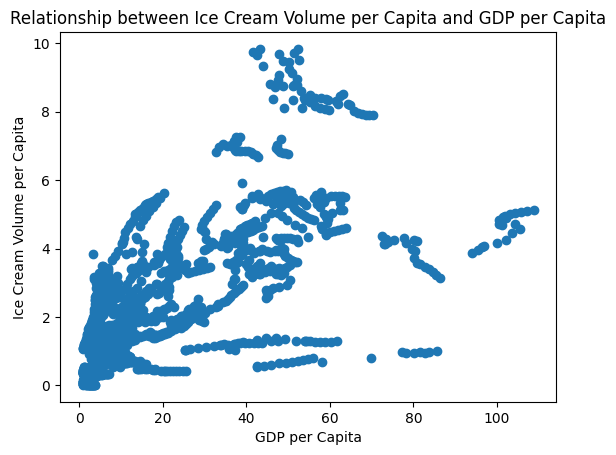

In [96]:
import matplotlib.pyplot as plt

plt.scatter(joint_data['GDP per Capita'], joint_data['Ice Cream Volume per Capita'])
plt.xlabel('GDP per Capita')
plt.ylabel('Ice Cream Volume per Capita')
plt.title('Relationship between Ice Cream Volume per Capita and GDP per Capita')
#plt.savefig('Output/ice_cream_vs_gdp.png')
plt.show()


### **5. Writing a function for percent of missing data**

In [97]:
def calculate_missing_percent(data):
    missing_percent = data.isnull().mean() * 100
    return missing_percent

In [98]:
missing_percent_table = calculate_missing_percent(joint_data)
# missing_percent_table.to_csv('Output/missing_percent_table.csv')
print(missing_percent_table)


Region                         0.0000
Country                        0.0000
Year                           0.0000
Possession of Refrigeratror    0.0000
GDP                            0.0000
Population                     0.0000
Ice Cream Value                3.6875
Ice Cream Volume               0.0000
Ice Cream Price                3.6875
GDP per Capita                 0.0000
Ice Cream Volume per Capita    0.0000
dtype: float64


In [99]:
import os

output_directory = 'Output'
os.makedirs(output_directory, exist_ok=True)

# Save the file to the 'Output' directory
missing_percent_table.to_csv(os.path.join(output_directory, 'missing_percent_table.csv'), index=False)
print(missing_percent_table)

Region                         0.0000
Country                        0.0000
Year                           0.0000
Possession of Refrigeratror    0.0000
GDP                            0.0000
Population                     0.0000
Ice Cream Value                3.6875
Ice Cream Volume               0.0000
Ice Cream Price                3.6875
GDP per Capita                 0.0000
Ice Cream Volume per Capita    0.0000
dtype: float64
